# 构建好的数据集 – Data Preprocessing

机器学习算法的最终结果的优劣取决于:
    
- 数据的质量；
- 数据中蕴含的有用信息量。

## 缺失数据的处理

样本由于各种原因缺失一些值是很常见的现象。其原因主要有：

- 数据采集过程查询的错误；
- 常用的度量方法不适用于某些特征；
- 调查过程中有些数据没有填写等。

In [2]:
from IPython.display import Image
%matplotlib inline

下面我们先通过一个 CSV (comma-separed values, 以逗号为分隔符的数值) 文件构造一个简单的例子，以便更好地把握问题的核心所在:

In [3]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
    '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


关于 `StringIO` 参考 [StringIO和BytesIO](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/001431918785710e86a1a120ce04925bae155012c7fc71e000)

由于手工搜索缺失值是很令人困扰的事情，为此，我们可以使用 `isnull` 方法来搜索缺失值，若 DataFrame 的元素单元包含数值型数值则返回 `False`，若数据值缺失则返回 `True`。

In [6]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [7]:
df.isnull().sum()  # 查看每列缺失值的数量

A    0
B    0
C    1
D    1
dtype: int64

pandas 的 DataFrame 的 `values` 属性可以用来访问相关的 NumPy 数组：

In [8]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### 删除存在缺失值的特征或样本

`dropna` 方法删除包含缺失值的样本行:

In [10]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


删除数据集中至少包含一个 NaN 值的特征列

In [11]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [12]:
# only drop rows where all columns are NaN

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [13]:
# drop rows that have less than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [14]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


删除缺失值有一定的缺点，如我们可能会删除过多的样本，导致分析结果的不可靠，同时删除过多的特征列，也可能面临丢失更多有价值的信息的风险。下面我们将转向另外一种最常用的缺失值的处理方法：插值技术。

### 缺失值填充

通过一些插值技术，借用数据集中其他训练样本来估计缺失值。最常用的插值技术是：**均值插补** (meaneinputation)，即使用相应的特征均值来替代缺失值。scikit-learn 中的 `Imputer` 方法便可以实现：

In [15]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # 使用相应的特征列的均值填充
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [16]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=1) # 使用相应的样本行的均值填充
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

`strategy` 的参数可以是 `'most_frequent'` 使用相应的行或者列中出现频次最高的数值进行填充。

## 理解 scikit-learn 预估器的 API

scikit-learn 中的 `Imputer` 类属于**转换器类**，主要用于数据的转换。这些类中常用的两个方法分别为 `fit` 和 `transform`。其中 `fit` 方法用于对数据集中的参数进行识别并构建相应的数据补齐模型，而 `transform` 方法则是使用刚构建的数据补齐模型对数据集中相应参数的缺失值进行补全。

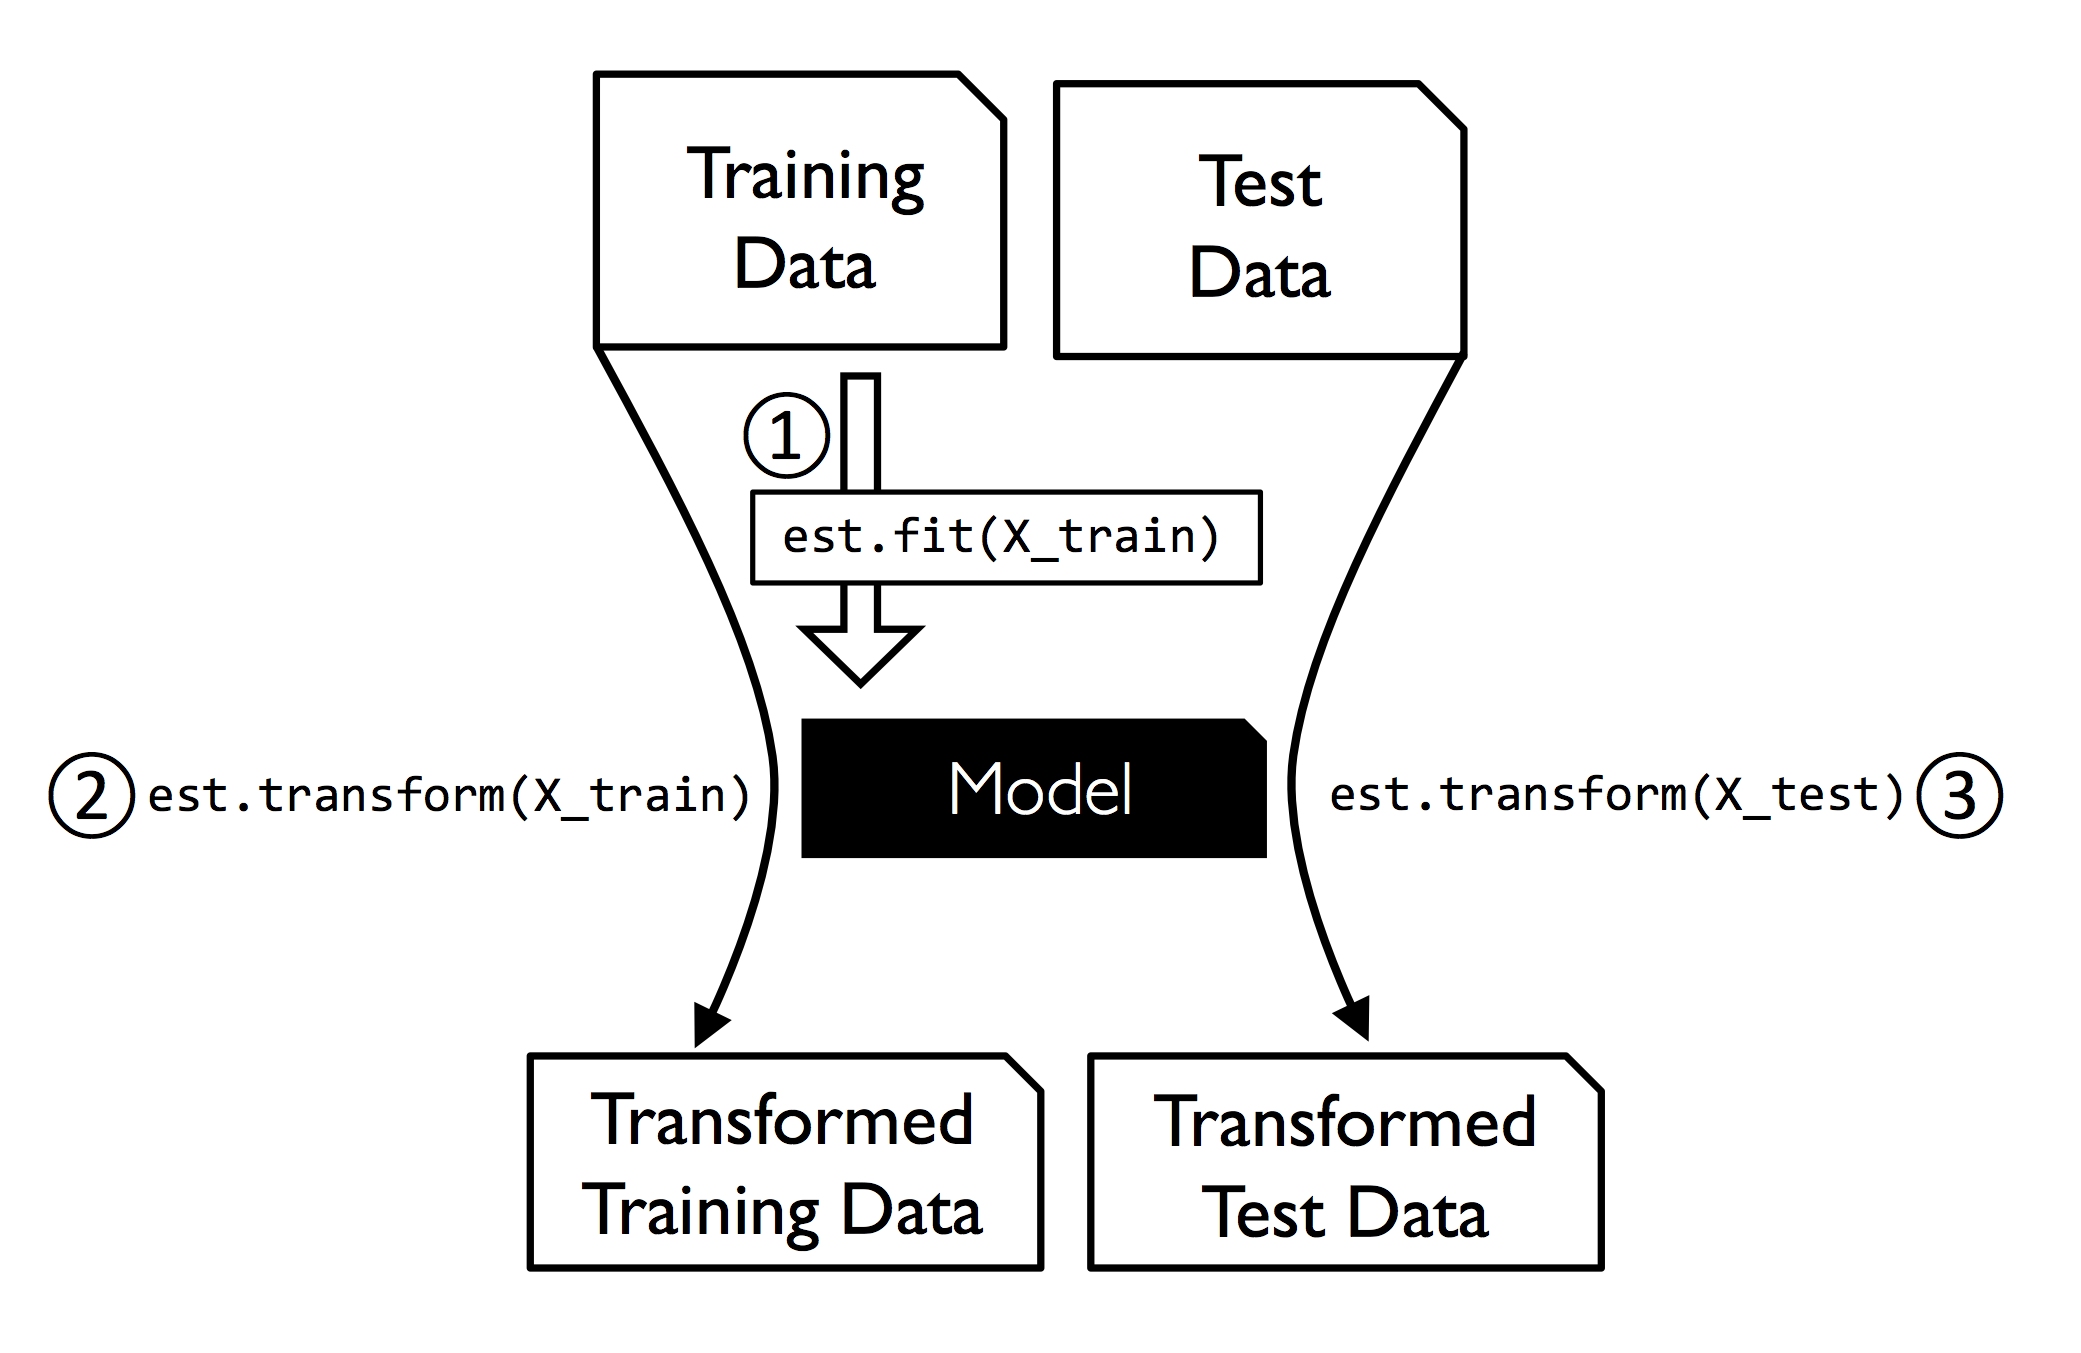

In [18]:
Image(filename='images/04_01.png', width=300) 

scikit-learn 中的分类器属于**预估器类**， 与转换器类很相似。预估器类包含 `fit` (设定)， `predict` (预测)， `transform` 方法。

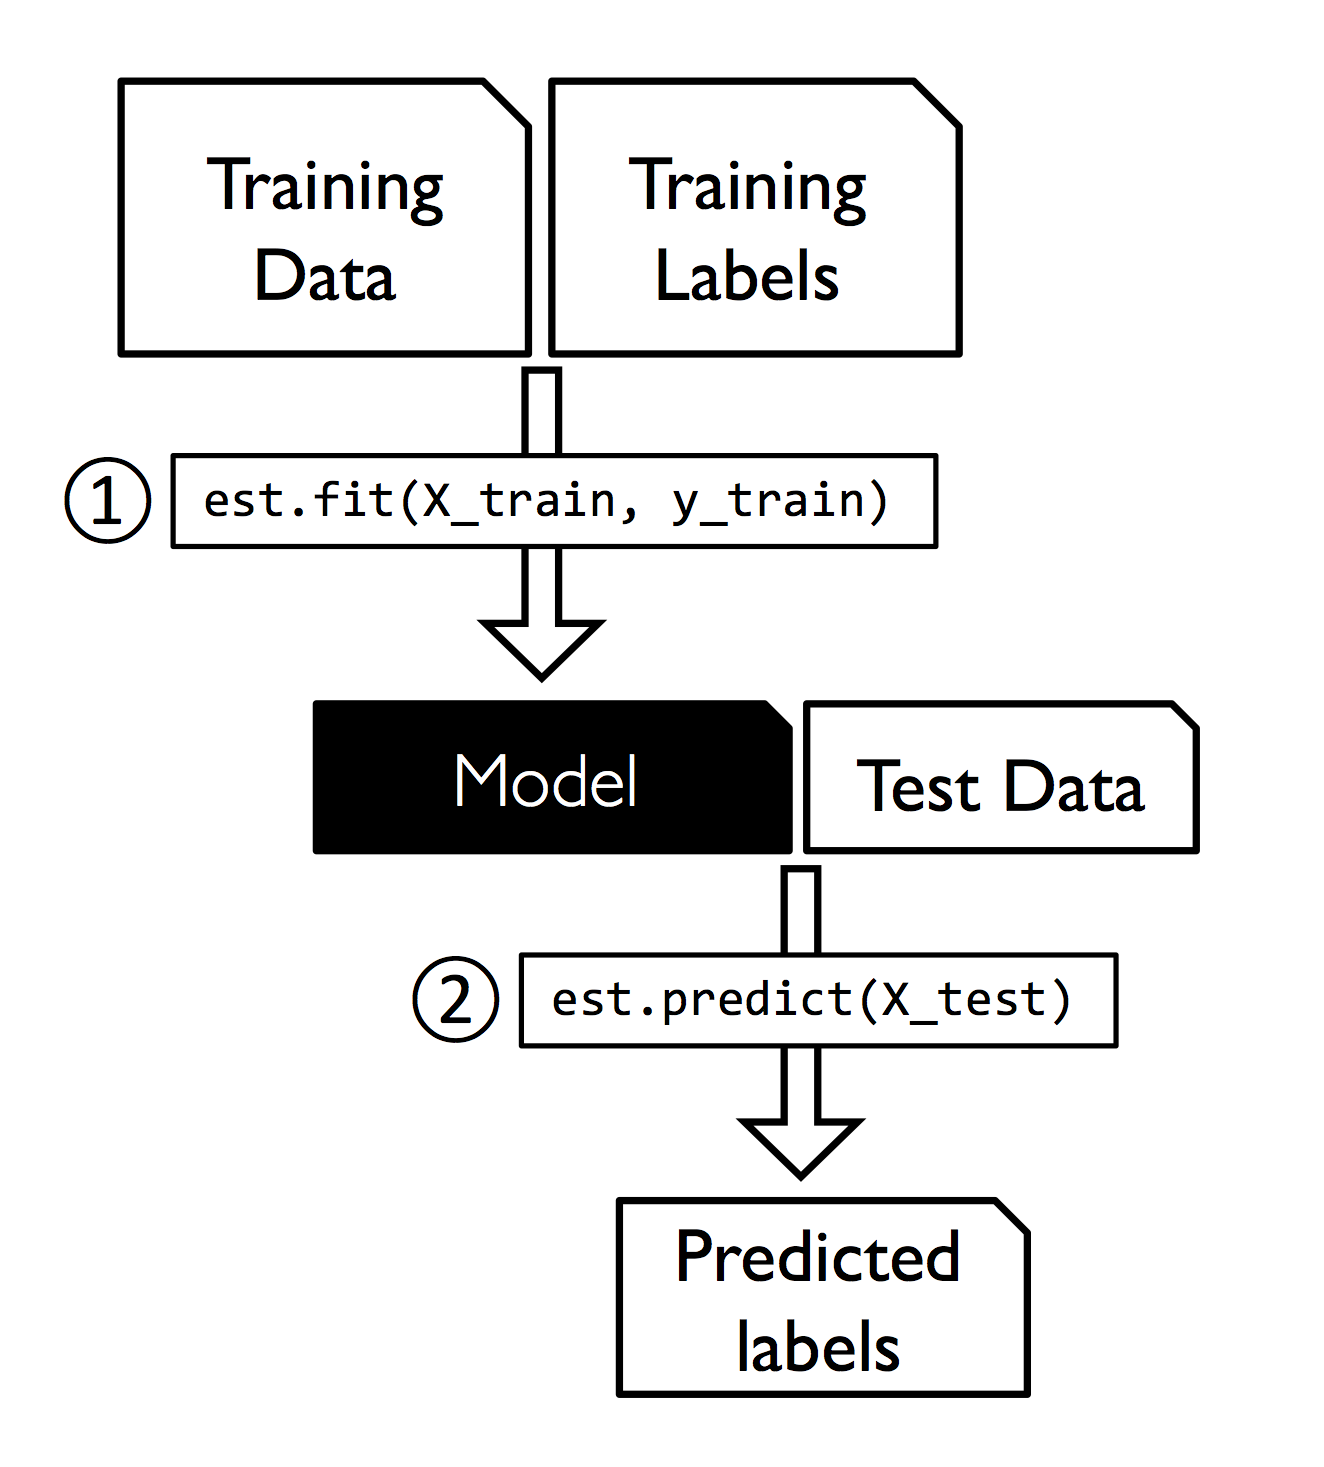

In [19]:
Image(filename='images/04_02.png', width=300) 

## 处理类别数据

Handling categorical data

类别数据的特征一般可以划分为**标称特征** (nominal feature) 和**有序特征** (ordinal feature, 类别的值是有序的或可以排序的)。

In [20]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Mapping ordinal features

In [21]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [22]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels

许多机器学习库要求类标以整数的形式进行编码。但需要注意的是编码后的类标并不是有序的 (因为那样没有意义)。

In [24]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [25]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [26]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


此外，使用 sklearn 的 `LabelEncoder` 类可以更加方便地完成对类标的整数编码工作:

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1], dtype=int64)

`fit_transform` 方法相当于调用 `fit` 和 `transform` 方法的快捷方式，我们可以使用 `inverse_transform` 方法还原类标的字符串形式。

In [28]:
# reverse mapping
class_le.inverse_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class2', 'class1', 'class2'], dtype=object)

### Performing one-hot encoding on nominal features

In [30]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

`LabelEncoder` 编码的方式可能会导致一些错误出现，比如 `X` 的第一列将 `'color'` 的属性值进行了排列，显然是不合理的。虽然，也可以获得一个不错的解，但是不是最优的。解决此问题的一个常用的手段是**独热编码** (one-hot encoding) 技术。这种方法的理念就是创建一个新的虚拟特征 (dummy feature), 虚拟特征的每一列各代表标称数据的一个值。下面使用 sklearn 的 OneHotEncoder 方法实现

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [32]:
# return dense array so that we can skip
# the toarray step

ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

另外，我们也可以通过 pandas 的 `get_dummies` 方法来实现读热编码。当应用于 DataFrame 数据时，`get_dummies` 方法只对字符串列进行转换。

In [33]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [34]:
# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [35]:
# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## Partitioning a dataset into a seperate training and test set

In [36]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## 将特征的值缩放到相同的区间

Bringing features onto the same scale

特征缩放 (feature scaling) 是数据集预处理的至关重要的一步。决策树和随机森林是机器学习算法中为数不多的不需要进行特征缩放的算法。然而，对于绝大多数机器学习和优化算法而言，将特征缩放到相同的区间可以使其性能更佳。

目前，有两个常用的特征缩放方法：**归一化** (normalization) 和**标准化** (standardization). 多数情况下，归一化指的是将特征的值缩放到区间 $[0,1]$, 它是**最小-最大缩放**的特例。

下面我们使用 min-max 缩放:

$$
x_{norm}^{(i)} = \frac{x^{(i)}-x_{\min}}{x_{\max} - x_{\min}}
$$

其中，$x^{(i)}$ 是一个特定的样本，$x_{\max}$ 和 $x_{\min}$ 分别是某特征列的最大值和最小值。

In [41]:
## from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

scikit-learn 也实现了标准化的 API：

In [42]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [43]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


我们使用 `StandardScaler` 对训练数据进行拟合，然后使用相同的拟合参数来完成对测试集以及未知数据的转换。

## 选择有意义的特征

下面我们介绍两个减少过拟合问题的方法:

### 使用 $\ell_1$ 正则化满足数据稀疏化

$\ell_1$ 正则化也可以看作是一种特征选择技术。

![图片发自简书App](http://upload-images.jianshu.io/upload_images/1114626-fadcb12f028ae840.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1080/q/50)

In [44]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [46]:
lr.intercept_

array([-1.26391955, -1.21598456, -2.37042554])

In [47]:
np.set_printoptions(8)

In [48]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [49]:
lr.coef_

array([[ 1.24561592,  0.18018264,  0.74657243, -1.16391516,  0.        ,
         0.        ,  1.15750432,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55904041,  2.50899404],
       [-1.53668128, -0.38702943, -0.99517928,  0.36499573, -0.05934415,
         0.        ,  0.66833773,  0.        ,  0.        , -1.93435555,
         1.23357935,  0.        , -2.23162397],
       [ 0.13550995,  0.16862059,  0.35725134,  0.        ,  0.        ,
         0.        , -2.4375666 ,  0.        ,  0.        ,  1.56363488,
        -0.8187136 , -0.49268522,  0.        ]])

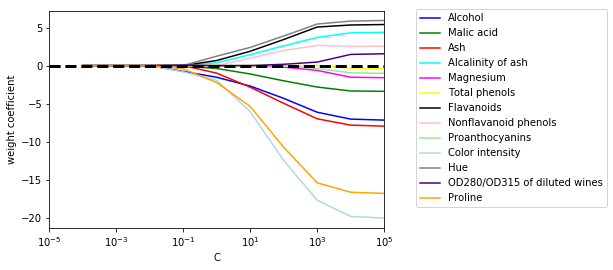

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

### 序列特征选择算法

In [51]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

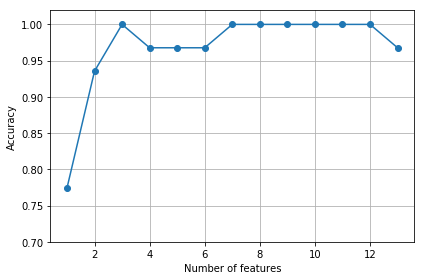

In [52]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [53]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [54]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [55]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


## Assessing feature importance with Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


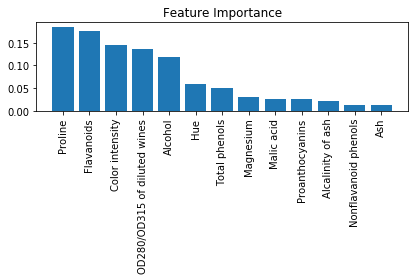

In [56]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [57]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [58]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
